In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [2]:
Cust_acq = pd.read_excel("Credit Card Data.xlsx",sheet_name=0)
Spend = pd.read_excel("Credit Card Data.xlsx",sheet_name=1)
Repay = pd.read_excel("Credit Card Data.xlsx",sheet_name=2)


In [3]:
#1 a
Cust_acq.loc[:,"Age"] = np.where(Cust_acq.Age < 18,Cust_acq.Age.mean(),Cust_acq.Age)

In [4]:
#1 b
df_cs = Spend.merge(Cust_acq,left_on="Customer",right_on="Customer",how="left")
df_cs.Amount = np.where(df_cs.Amount>df_cs.Limit,df_cs.Limit/2,df_cs.Amount)
Spend.Amount = df_cs.Amount

In [5]:
#1 c 
temp = Repay.merge(Cust_acq,left_on="Customer",right_on="Customer",how="left")
temp.Amount = np.where(temp.Amount>temp.Limit,temp.Limit,temp.Amount)
Repay.Amount = temp.Amount

In [6]:
#2 a
len(Cust_acq.Customer.unique())

100

In [7]:
#2 b
len(Spend.Type.unique())

15

In [158]:
#2 c
monthly_spend = round(Spend.groupby(Spend.Month.dt.month).agg({"Amount": "mean"}),2)
print("Avg monthly spend:",monthly_spend.mean()[0].round(),"\n\nAvg money spend per month\n",monthly_spend)
#

Avg monthly spend: 150778.0 

Avg money spend per month
           Amount
Month           
1      153074.05
2      161588.98
3      144319.26
4      145284.70
5      149466.01
6      166297.50
7      179130.33
8      180310.24
9      150616.91
10     110842.65
11     160269.74
12     108140.60


In [157]:
#2 d
monthly_repay = round(Repay.groupby(Repay.Month.dt.month).agg({"Amount": "mean"}),2)
print("Avg monthly repayed:",monthly_repay.mean()[0].round(),"\n\nAvg money repayed per month\n",monthly_repay)
#

Avg monthly repayed: 159747.0 

Avg money repayed per month
           Amount
Month           
1      165905.24
2      160934.57
3      172041.56
4      145718.82
5      182598.05
6      159447.40
7      145543.40
8      175245.74
9      118936.57
10     173375.65
11     179681.42
12     137534.99


In [10]:
#2 e
mrate = 0.29
m_spd = pd.DataFrame(df_cs.groupby(df_cs.Month.dt.month)["Amount"].sum().round())
m_rpy = pd.DataFrame(temp.groupby(temp.Month.dt.month)["Amount"].sum().round())

monthly_profit = m_rpy - m_spd
pd.DataFrame({"Months":["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
,"Profit":np.where(monthly_profit.Amount>0,monthly_profit.Amount*mrate,0)}).set_index("Months")


,Profit
Months,
Jan,0.00
Feb,0.00
Mar,1258412.08
Apr,18884.51
May,4983133.51
Jun,0.00
Jul,0.00
Aug,294063.19
Sep,0.00


In [11]:
#2 f Product
types = round(df_cs.groupby("Product").agg({"Amount":"sum"}),2).sort_values(by="Amount",ascending=False).head(5).T.columns
for i in types:
    print(i)

Gold
Platimum
Silver


In [12]:
#2 f Type
types = round(df_cs.groupby("Type").agg({"Amount":"sum"}),2).sort_values(by="Amount",ascending=False).head(5).T.columns
for i in types:
    print(i)

PETRO
CAMERA
FOOD
AIR TICKET
TRAIN TICKET


In [13]:
#2 g
city_spend = round(Cust_acq.merge(Spend,left_on="Customer",right_on="Customer",how="right").groupby("City").agg("sum")["Amount"].sort_values(ascending=False),2).head(1).index[0]
print(city_spend)

COCHIN


In [14]:
#2 h
df = df_cs.copy()
df.loc[:,"Age_Group"] = np.where(df.Age <= 24,"18-24",np.where(df.Age <= 30,"25-30",np.where(df.Age <= 45,"31-45",np.where(df.Age <= 60,"46-60","61-80"))))
age_group = round(df.groupby("Age_Group").agg({"Amount":"sum"})).sort_values(by="Amount").tail(1).index[0]
print(f"{age_group} year olds spend the most money")

31-45 year olds spend the most money


In [15]:
#2 i
print("Top 10 customers by repayment")
round(temp.groupby("Customer").agg({"Amount":"sum"}).sort_values(by="Amount",ascending=False)).head(10).reset_index().Customer

Top 10 customers by repayment


0    A61
1    A60
2    A42
3    A13
4    A38
5    A43
6    A40
7    A14
8    A44
9    A26
Name: Customer, dtype: object

In [16]:
#3 table
df_cs["Year"] = df_cs.Month.dt.year
gf_df = round(df_cs.pivot_table(columns=["Product"],index=["City","Year"],values="Amount",aggfunc="sum"),2)
gf_df

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9870697.48  1045045.91  1215574.95
           2005  14914471.02   885722.61   909077.89
           2006  13121349.45   709694.49  1650718.66
BOMBAY     2004   6221750.00   946976.34   518676.34
           2005   9533804.39   836008.47   572757.22
           2006  10196028.75  1022213.94   849474.78
CALCUTTA   2004   8643979.18  2178863.27   597488.36
           2005  11691980.02  4822990.05   343259.51
           2006   9571088.34  2456411.61   876154.14
CHENNAI    2004   1415072.88  2944114.92   308774.69
           2005   3013080.93  5243051.17   428758.51
           2006   3057965.84  6066895.56   313388.10
COCHIN     2004   9730434.55  2974235.36   789194.95
           2005  11025312.81  4151462.73   643789.22
           2006  12628278.51  5530968.85  1100865.89
DELHI      2004   3467979.09   338842.13   804097.08
           2005   2508487.43   443619.82   493446.15
           2006   3535699.84   133365.05   760770.64
PATNA      2004   1915473.34   816637.27   844829.53
           2005   2187692.09  2534969.17   949455.26
           2006   2424509.41   745381.45   697258.92
TRIVANDRUM 2004   2272699.66  1770528.16   272908.78
           2005   1984570.77  3401178.64   372614.29
           2006   2827396.99  2122721.65   533562.71

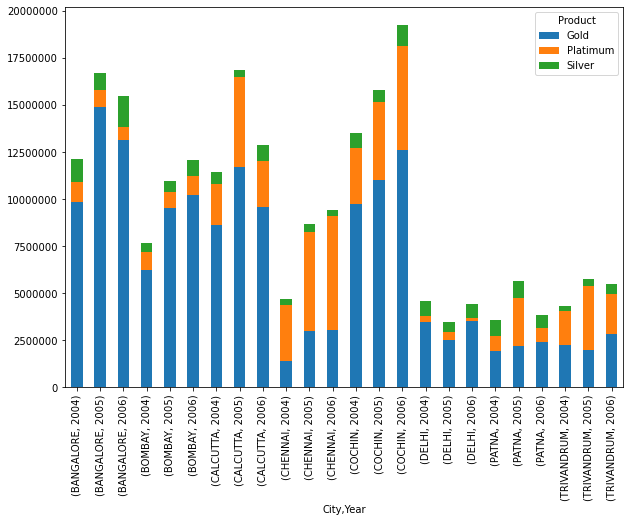

In [17]:
#3 plot
gf_df.plot(kind="bar",stacked=True,figsize=(10,7))
plt.ticklabel_format(axis="y",style="plain")

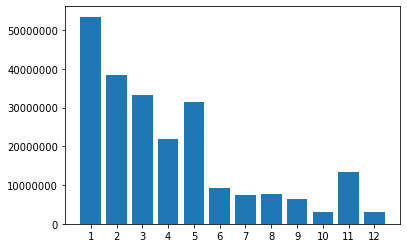

In [18]:
#4 a
plt.bar(m_spd.index.astype(str),m_spd.Amount)
plt.ticklabel_format(axis="y",style="plain")


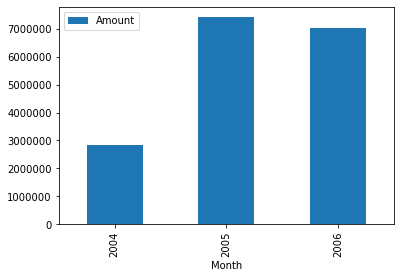

In [162]:
#4 b
df_cs[df_cs.Type=="AIR TICKET"].groupby(df.Month.dt.year.astype(str)).agg({"Amount":"sum"}).reset_index().plot(kind="bar",y="Amount",x="Month")
plt.ticklabel_format(axis="y",style="plain")

<AxesSubplot:xlabel='Month'>

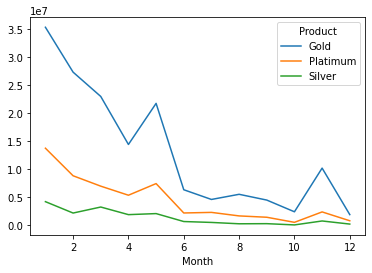

In [163]:
#4 c

df_cs.pivot_table(columns=df_cs["Month"].dt.month,index="Product",values="Amount",aggfunc="sum").T.round().plot(kind="line")
#there is drop and then a sudden rise in May and in November 
#there might have been some event that helped in the rise of money spend

In [133]:
#5 prep df
temp.loc[:,"Months"] = temp.Month.dt.month_name()
temp.loc[:,"Year"] = temp.Month.dt.year

In [141]:
#5 

def TopCust(data_given,product="Platimum",time_period="Year"):
    '''
    data_given  - DataFrame
    product     - Default["Platimum"], values = ["Gold","Silver","Platimum"]
    time_period - Default["Year"], values = ["Year","Months"]
    '''
    df = data_given[data_given.Product == product]
    differ = time_period
    start_df = df[df.City=="Empty"]
    for city in df.City.unique():
        for t in df[differ].unique():
            data = df[(df.City == city)  & (df[differ]==t)]
            data = data.groupby(["Customer","City",differ]).agg({"Amount":"sum"}).rank(ascending=False).reset_index()
            start_df = pd.concat([start_df,data])[["Customer","Amount","City",differ]]
            
    final_df = start_df.pivot_table(index=[differ,"Amount"],columns=["City"],values="Customer",aggfunc="max")
    final_df = final_df.reset_index()
    final_df["Rank"] = final_df.Amount.astype(int)
    final_df = final_df.drop("Amount",axis=1).set_index([differ,"Rank"])
    output = final_df.fillna("No Customers")
    return output


In [148]:
TopCust(temp,"Gold","Months")


City               BANGALORE        BOMBAY      CALCUTTA       CHENNAI  \
Months    Rank                                                           
April     1               A1           A62           A60           A27   
          2              A13           A12           A10  No Customers   
          3              A43           A91           A89  No Customers   
          4              A14           A42           A31  No Customers   
          5              A30           A17  No Customers  No Customers   
          6              A92  No Customers  No Customers  No Customers   
August    1              A13           A12           A60           A27   
          2              A14           A17           A15  No Customers   
          3     No Customers  No Customers           A29  No Customers   
          4     No Customers  No Customers  No Customers  No Customers   
December  1              A14           A17  No Customers           A27   
          2     No Customers  No Customers  No Customers  No Customers   
February  1              A13           A12           A29           A27   
          2              A30           A62           A60  No Customers   
          3              A14           A17           A31  No Customers   
          4               A1           A42           A15  No Customers   
          5              A43  No Customers           A10  No Customers   
January   1              A43           A42           A60           A27   
          2               A1           A12           A10           A67   
          3              A13           A17           A29  No Customers   
          4              A14           A62           A15  No Customers   
          5              A30  No Customers  No Customers  No Customers   
          6              A63  No Customers  No Customers  No Customers   
July      1              A43           A17           A31           A27   
          2               A1           A12           A60  No Customers   
          3              A14  No Customers           A10  No Customers   
          4              A13  No Customers  No Customers  No Customers   
June      1              A13           A17           A15           A27   
          2              A43           A12           A60  No Customers   
          3              A30  No Customers  No Customers  No Customers   
          4              A14  No Customers  No Customers  No Customers   
March     1              A14           A42           A15           A27   
          2              A43           A17           A10  No Customers   
          3              A30           A12           A29  No Customers   
          4              A13           A62           A31  No Customers   
          5              A88  No Customers           A60  No Customers   
          6              A81  No Customers  No Customers  No Customers   
May       1              A43           A42           A29           A27   
          2              A30           A12           A15           A67   
          3              A14           A17           A10  No Customers   
          4              A13           A62           A60  No Customers   
          5              A63  No Customers           A31  No Customers   
          6     No Customers  No Customers  No Customers  No Customers   
November  1               A1           A62           A60           A27   
          2              A13           A42  No Customers  No Customers   
          3              A14  No Customers  No Customers  No Customers   
          4              A63  No Customers  No Customers  No Customers   
          5              A43  No Customers  No Customers  No Customers   
October   1              A43           A62           A15  No Customers   
          2     No Customers           A12  No Customers  No Customers   
          3     No Customers           A17  No Customers  No Customers   
          4     No Customers           A42  No Customers  No Customers   
Sept